In [14]:
# Вариант 8
import torch
X = torch.rand(1500, 2)
Y = ((torch.abs(X[:, 1] - 0.5) + X[:, 0]) < 0.9).float()
Y = Y.view(-1, 1)

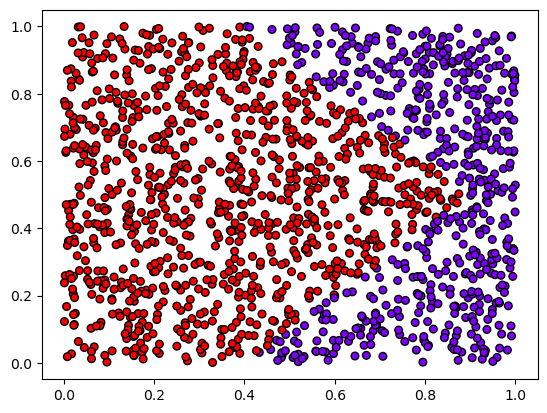

In [15]:
import numpy as np
import matplotlib .pyplot as plt
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c = Y.numpy()[:, 0],
            s=30, cmap='rainbow', edgecolors='black')

In [16]:
dataset = torch.utils.data.TensorDataset(X, Y)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [1400, 100])

from torch.utils.data import DataLoader

batch_size = 100

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True)

testX = test_dataset[:][0]
testY = test_dataset[:][1]

In [17]:
import torch.nn as nn
device = torch.device('cpu')
device

device(type='cpu')

In [18]:
model = nn.Sequential(
  nn.Linear(2, 100),
  nn.Sigmoid(),
  nn.Linear(100, 1),
  nn.Sigmoid()
)
model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
  (3): Sigmoid()
)

In [19]:
loss      = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),         # параметры модели
                            lr=0.8, momentum=0.8)        # параметры оптимизатора

In [20]:
epochs = 100
history = []
for epoch in range(epochs):
  for x_batch, y_batch in train_loader:
    # 1. # загружаем батч данных (вытянутый в линию)

    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    # 2. вычисляем скор с помощью прямого распространения ( .forward or .__call__ )
    logits = model(x_batch)

    # 3. вычислеяем - функцию потерь (loss)
    L = loss(logits, y_batch)
    history.append(L.item())

    # 4. вычисляем градиенты
    optimizer.zero_grad()
    L.backward()

    # 5. шаг градиентного спуска
    optimizer.step()


In [21]:
import matplotlib.pyplot as plt

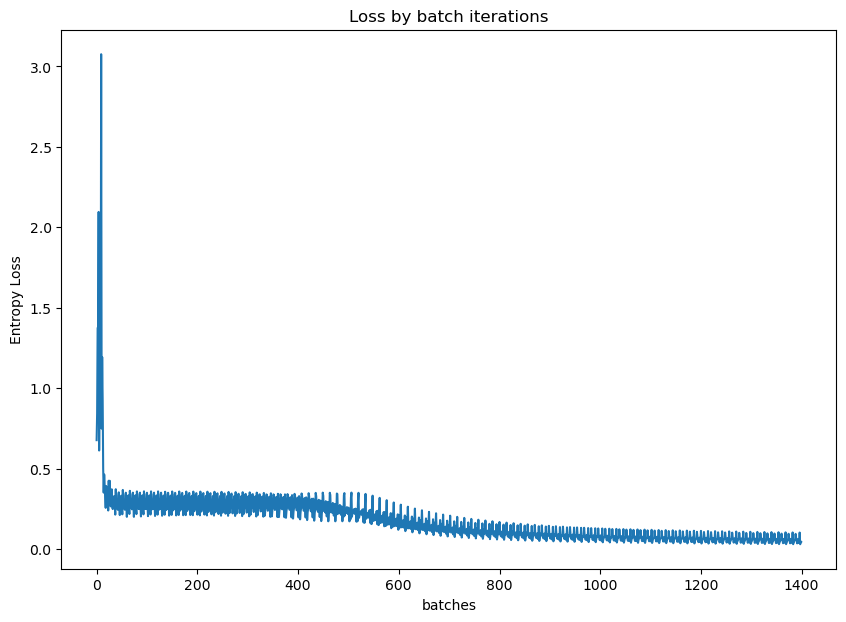

In [22]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

In [23]:
acc = 0
for x_batch, y_batch in test_dataset:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  preds = 0 if (float(model(x_batch)[0]) < 0.5) else 1
  acc += (preds==y_batch).cpu().numpy().mean()
acc/100

0.98

In [24]:
acc = 0
for x_batch, y_batch in train_dataset:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  preds = 0 if (float(model(x_batch)[0]) < 0.5) else 1
  acc += (preds==y_batch).cpu().numpy().mean()
acc/1400

0.9871428571428571

In [25]:
ok, not_ok = [],[]
for x_batch, y_batch in dataset:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  preds = 0 if (float(model(x_batch)[0]) < 0.5) else 1
  if preds == y_batch:
    ok.append(x_batch.tolist())

  else:
    not_ok.append(x_batch.tolist())

ok_x = [point[0] for point in ok]
ok_y = [point[1] for point in ok]

not_ok_x = [point[0] for point in not_ok]
not_ok_y = [point[1] for point in not_ok]

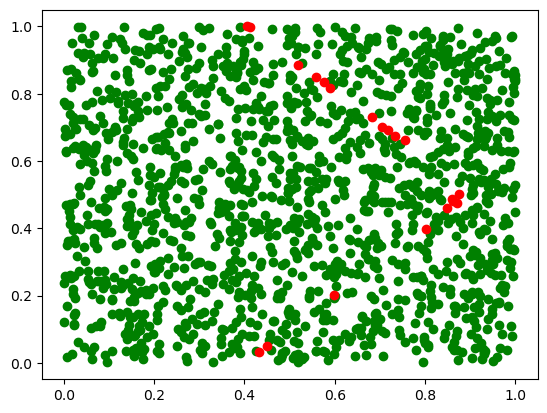

In [26]:


plt.scatter(ok_x, ok_y, color= 'green')
plt.scatter(not_ok_x, not_ok_y, color='red')